In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
def plot_TS(timesteps,values, format=".", start=0, end = None, label = None,X_label='Time',y_label= "Value of EURUSD" , Legend = False , color='r'):
    """
    plots timesteps (a series of points in time) against the values (a series of values across timesteps)

    parameters : timesteps,values, format="." of plot, start=0 of plot, end = None of plot, label = None of the plot
    """
    plt.plot(timesteps[start:end],values,format, label = label,c=color)
    plt.xlabel(X_label)
    plt.ylabel(y_label)

    if Legend:
        plt.legend()
    # if label:
    #     plt.title(label)
    plt.grid(True)

# def denormalize(forecast) :
#     max1 = 999.0
#     min1 = 0.9
#     max2 = 4996.0 
#     min2 = 14.37
#     denormalized_forecast = forecast * (max1 - min1) + min1 
#     denormalized_forecast_2 = forecast * (max2 - min2) + min2 
    
#     return (denormalized_forecast + denormalized_forecast_2)/2

import numpy as np

def denormalize(forecast):
    max1 = 999.0
    min1 = 0.9
    max2 = 4996.0 
    min2 = 14.37

    forecast = np.asarray(forecast, dtype=float)

    den1 = forecast * (max1 - min1) + min1
    den2 = forecast * (max2 - min2) + min2

    return (den1 + den2) / 2

    

In [3]:
df = pd.read_csv('E:\FAI_Project\Finance-Management-using-AI\data\prepared_data\Aggregated_Dataset_TS.csv')

In [98]:
df.head()

,Unnamed: 0,Date,Amount_norm
0,0,2020-01-01,6.794041
1,1,2020-02-01,6.782061
2,2,2020-03-01,5.366219
3,3,2020-04-01,6.442165
4,4,2020-05-01,6.642147


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   60 non-null     int64  
 1   Date         60 non-null     object 
 2   Amount_norm  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [6]:
len(df)

60

In [7]:
split_index = len(df) - 12
train = df.iloc[0:split_index]
test = df.iloc[split_index:]

In [8]:
price_df = df['Amount_norm']
price_df.head()

0    6.794041
1    6.782061
2    5.366219
3    6.442165
4    6.642147
Name: Amount_norm, dtype: float64

Text(0.5, 1.0, 'Months')

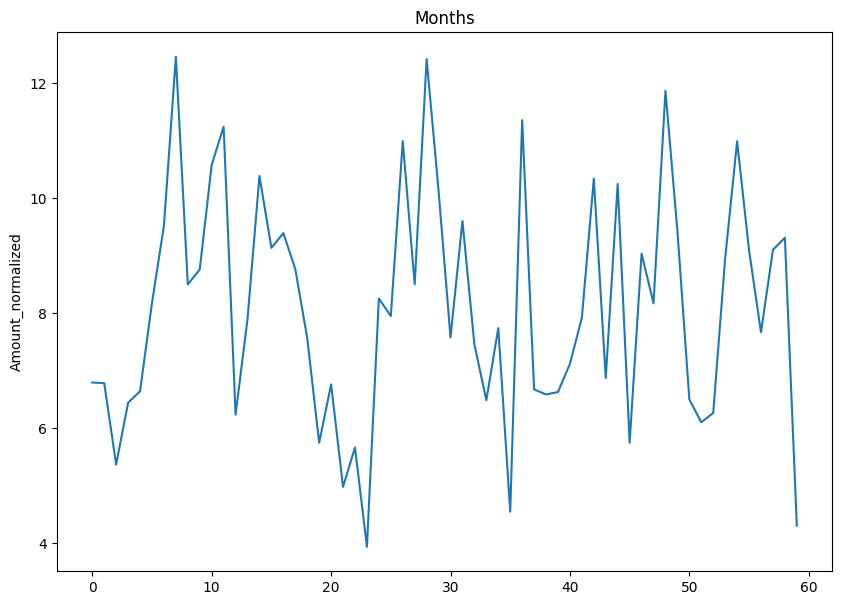

In [9]:
price_df.plot(figsize=(10,7))
plt.ylabel("Amount_normalized")
plt.title("Months")

In [10]:
# def denormalize(row):
#     max1 = 4996.0
#     min1 = 14.37
#     if row['origin'] == 'dataset1':
#         return row['Amount_norm'] * (max1 - min1) + min1
#     # else:  # dataset2
#     #     return row['Amount_norm'] * (max2 - min2) + min2

In [11]:
train_series = train['Amount_norm'].astype(float)
from statsmodels.tsa.api import ExponentialSmoothing

# Assuming 'monthly_data' is your pandas Series with 'Date' as index and 'Price' as values
model = ExponentialSmoothing(train_series,
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12,
                             )

fit = model.fit()
forecast = fit.forecast(steps=12) # Forecast for the next 12 months


ogvalue = forecast * (original_max - original_min) + original_min



In [12]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Amount_norm'], forecast)
print(f"MAE: {mae}")

MAE: 1.9365034105851124


In [13]:
denormalized_forecast = denormalize(forecast)

In [14]:
denormalized_test = denormalize(test['Amount_norm'])

In [15]:
mae = mean_absolute_error(denormalized_test, denormalized_forecast)
print(f"MAE: {mae}")

MAE: 5789.88376968906


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'monthly_data' is your pandas Series with 'Date' as index and 'Price' as values
# Example parameters - you will need to determine the best ones for your data
# e.g., using auto_arima or ACF/PACF plots
model = SARIMAX(train_series,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

fit = model.fit(disp=False)
forecast_2 = fit.forecast(steps=12) # Forecast for the next 12 months


e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [17]:
print(type(forecast_2))
print(forecast_2.head())


<class 'pandas.core.series.Series'>
48     9.331625
49     8.880670
50     9.974052
51     9.249533
52    10.530746
Name: predicted_mean, dtype: float64


In [18]:
mae = mean_absolute_error(test['Amount_norm'], forecast_2)
print(f"MAE: {mae}")

MAE: 2.0568495592357023


In [19]:
denormalized_forecast_2 = denormalize(forecast_2)
# denormalized_test = denormalize(test)

In [20]:
mae = mean_absolute_error(denormalized_test, denormalized_forecast_2)
print(f"MAE: {mae}")

MAE: 6149.702507424253


C:\Users\HP\AppData\Local\Temp\ipykernel_25792\4275168018.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


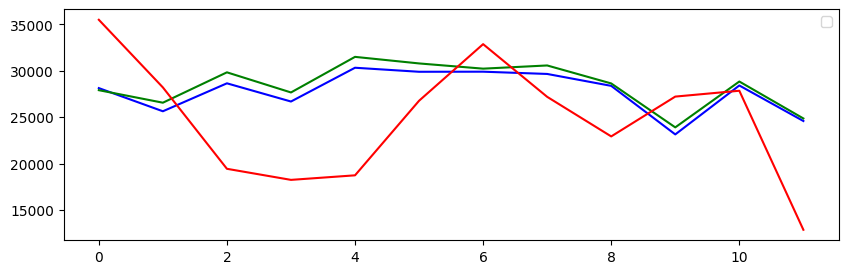

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(denormalized_forecast,c='blue')
plt.plot(denormalized_forecast_2, c= 'green')
plt.plot(denormalized_test, c= 'red')
plt.legend()

# Trying Prophet

In [22]:
# !pip install prophet
# !pip install plotly

In [23]:
from prophet import Prophet

e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
timeseries_df = df[['Date','Amount_norm']]

In [25]:
# timeseries_df.set_index('Date',inplace= True)
train.head()

,Unnamed: 0,Date,Amount_norm
0,0,2020-01-01,6.794041
1,1,2020-02-01,6.782061
2,2,2020-03-01,5.366219
3,3,2020-04-01,6.442165
4,4,2020-05-01,6.642147


In [26]:
train.rename(columns={'Date':'ds','Amount_norm':'y'},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25792\1495547425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Date':'ds','Amount_norm':'y'},inplace=True)


In [27]:
timeseries_df = train[['ds','y']]

In [28]:
p=Prophet(interval_width=0.92,daily_seasonality=False,yearly_seasonality=True)
model= p.fit(timeseries_df)

13:33:01 - cmdstanpy - INFO - Chain [1] start processing
13:33:02 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = p.make_future_dataframe(periods=12,freq='M')

e:\FAI_Project\Finance-Management-using-AI\myenv\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [30]:
forecast_prediction = p.predict(future)

In [31]:
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2024-07-31,8.120170,3.208474,9.342356,8.120170,8.120170,-1.949202,-1.949202,-1.949202,-1.949202,-1.949202,-1.949202,0.0,0.0,0.0,6.170968
56,2024-08-31,8.123214,7.954158,13.646886,8.123214,8.123214,2.671464,2.671464,2.671464,2.671464,2.671464,2.671464,0.0,0.0,0.0,10.794678
57,2024-09-30,8.126159,2.726983,8.574201,8.126159,8.126159,-2.321181,-2.321181,-2.321181,-2.321181,-2.321181,-2.321181,0.0,0.0,0.0,5.804978
58,2024-10-31,8.129203,5.749435,11.825215,8.129203,8.129203,0.613775,0.613775,0.613775,0.613775,0.613775,0.613775,0.0,0.0,0.0,8.742978
59,2024-11-30,8.132148,2.712552,8.767620,8.132148,8.132148,-2.357586,-2.357586,-2.357586,-2.357586,-2.357586,-2.357586,0.0,0.0,0.0,5.774562


In [32]:
train.tail()

,Unnamed: 0,ds,y
43,43,2023-08-01,6.870815
44,44,2023-09-01,10.245349
45,45,2023-10-01,5.745625
46,46,2023-11-01,9.033995
47,47,2023-12-01,8.171044


In [33]:
test

,Unnamed: 0,Date,Amount_norm
48,48,2024-01-01,11.866349
49,49,2024-02-01,9.431114
50,50,2024-03-01,6.500740
51,51,2024-04-01,6.101971
52,52,2024-05-01,6.265825
53,53,2024-06-01,8.951050
54,54,2024-07-01,10.988853
55,55,2024-08-01,9.091920
56,56,2024-09-01,7.666784
57,57,2024-10-01,9.100664


In [34]:
test

,Unnamed: 0,Date,Amount_norm
48,48,2024-01-01,11.866349
49,49,2024-02-01,9.431114
50,50,2024-03-01,6.500740
51,51,2024-04-01,6.101971
52,52,2024-05-01,6.265825
53,53,2024-06-01,8.951050
54,54,2024-07-01,10.988853
55,55,2024-08-01,9.091920
56,56,2024-09-01,7.666784
57,57,2024-10-01,9.100664


Text(0.5, 1.0, 'Expense Forecast')

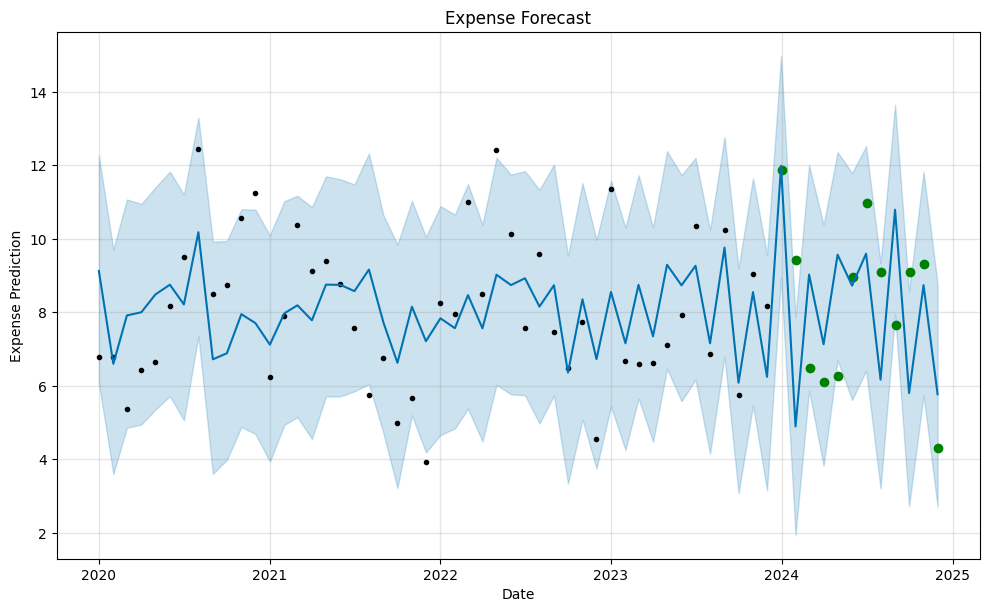

In [35]:
p.plot(forecast_prediction)
# Customize the plot
plt.scatter(test['Date'],test['Amount_norm'], c='Green')
plt.xlabel('Date')
plt.ylabel('Expense Prediction')
plt.title('Expense Forecast')

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Amount_norm'], forecast_prediction['yhat'][-12:])
print(f"MAE: {mae}")

MAE: 2.0431320673437487


In [37]:
denormalized_forecast_3 = denormalize(forecast_prediction['yhat'][-12:])
# denormalized_test = denormalize(test)

In [38]:
mae = mean_absolute_error(denormalized_test, denormalized_forecast_3)
print(f"MAE: {mae}")

MAE: 6108.689058528718


# Trying the model on weekly dataset

In [39]:
df_key =  pd.read_csv('E:\FAI_Project\Finance-Management-using-AI\data\prepared_data\Forecasting_Master_Dataset.csv')

In [40]:
df_key.head()

,Unnamed: 0,Date,Amount,Type,Normalized_Amount,dataset
0,0,2020-01-02,1485.69,Expense,0.295349,0
1,1,2020-01-02,1475.58,Expense,0.293320,0
2,2,2020-01-04,1185.08,Expense,0.235005,0
3,3,2020-01-05,2291.00,Income,0.457005,0
4,4,2020-01-13,1126.88,Expense,0.223322,0


In [41]:
df_key['Date']

0       2020-01-02
1       2020-01-02
2       2020-01-04
3       2020-01-05
4       2020-01-13
           ...    
2587    2024-08-04
2588    2024-08-07
2589    2024-08-09
2590    2024-08-10
2591    2024-08-11
Name: Date, Length: 2592, dtype: object

In [42]:
mask = (df_key['Type'] == 'EXPENSE') | (df_key['Type'] == 'Expense')
filtered = df_key[mask]

# 2) Select columns
TSA = filtered[['Date', 'Normalized_Amount']]
TSA = TSA.sort_values('Date')

In [43]:
filtered.sort_values('Date')

,Unnamed: 0,Date,Amount,Type,Normalized_Amount,dataset
0,0,2020-01-02,1485.69,Expense,0.295349,0
1,1,2020-01-02,1475.58,Expense,0.293320,0
2,2,2020-01-04,1185.08,Expense,0.235005,0
4,4,2020-01-13,1126.88,Expense,0.223322,0
5,5,2020-01-14,448.68,Expense,0.087182,0
...,...,...,...,...,...,...
1493,1493,2024-12-21,784.35,Expense,0.154564,0
1494,1494,2024-12-23,325.64,Expense,0.062484,0
1496,1496,2024-12-28,514.09,Expense,0.100313,0
1495,1495,2024-12-28,727.25,Expense,0.143102,0


In [44]:
split_index = len(filtered) - 30
# train_fitered = TSA.iloc[0:split_index]
test_filtered = filtered.iloc[split_index:]

In [45]:
test_filtered.count()

Unnamed: 0           30
Date                 30
Amount               30
Type                 30
Normalized_Amount    30
dataset              30
dtype: int64

In [46]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# scaler = StandardScaler()

# filtered["Amount"] = (
#     filtered
#     .groupby("dataset")["Amount"]
#     .transform(
#         lambda x: pd.Series(
#             scaler.fit_transform(x.to_frame()).ravel(),
#             index=x.index
#         )
#     )
# )


In [47]:
filtered

,Unnamed: 0,Date,Amount,Type,Normalized_Amount,dataset
0,0,2020-01-02,1485.69,Expense,0.295349,0
1,1,2020-01-02,1475.58,Expense,0.293320,0
2,2,2020-01-04,1185.08,Expense,0.235005,0
4,4,2020-01-13,1126.88,Expense,0.223322,0
5,5,2020-01-14,448.68,Expense,0.087182,0
...,...,...,...,...,...,...
2586,2586,2024-08-04,500.00,EXPENSE,0.500501,1
2588,2588,2024-08-07,200.00,EXPENSE,0.200200,1
2589,2589,2024-08-09,10.00,EXPENSE,0.010010,1
2590,2590,2024-08-10,40.00,EXPENSE,0.040040,1


In [48]:
# # 2) Select columns
# TSA = filtered[['Date', 'Amount']]
# # TSA = TSA.sort_values('Date')
# TSA = TSA.sort_values('Date')

In [49]:
split_index = len(TSA) - 30
train = TSA.iloc[0:split_index]
test = TSA.iloc[split_index:]

In [50]:
train.rename(columns={'Date':'ds','Normalized_Amount':'y'},inplace=True)
test.rename(columns={'Date':'ds','Normalized_Amount':'y'},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25792\2497408010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'Date':'ds','Normalized_Amount':'y'},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25792\2497408010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={'Date':'ds','Normalized_Amount':'y'},inplace=True)


In [51]:
p=Prophet(interval_width=0.92,daily_seasonality=False,yearly_seasonality=True)
model= p.fit(train)

13:33:03 - cmdstanpy - INFO - Chain [1] start processing
13:33:04 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = p.make_future_dataframe(periods=45,freq='D')

In [53]:
forecast_prediction = p.predict(future)

In [54]:
forecast_prediction['ds']

0      2020-01-02
1      2020-01-04
2      2020-01-13
3      2020-01-14
4      2020-01-18
          ...    
1098   2024-12-27
1099   2024-12-28
1100   2024-12-29
1101   2024-12-30
1102   2024-12-31
Name: ds, Length: 1103, dtype: datetime64[ns]

In [55]:
test

,ds,y
1463,2024-11-17,0.163786
1464,2024-11-17,0.362209
1465,2024-11-17,0.320578
1466,2024-11-18,0.136493
1467,2024-11-18,0.273864
1468,2024-11-19,0.118806
1469,2024-11-20,0.237607
1470,2024-11-20,0.074452
1471,2024-11-22,0.156814
1473,2024-11-24,0.164065


Text(0.5, 1.0, 'Expense Forecast')

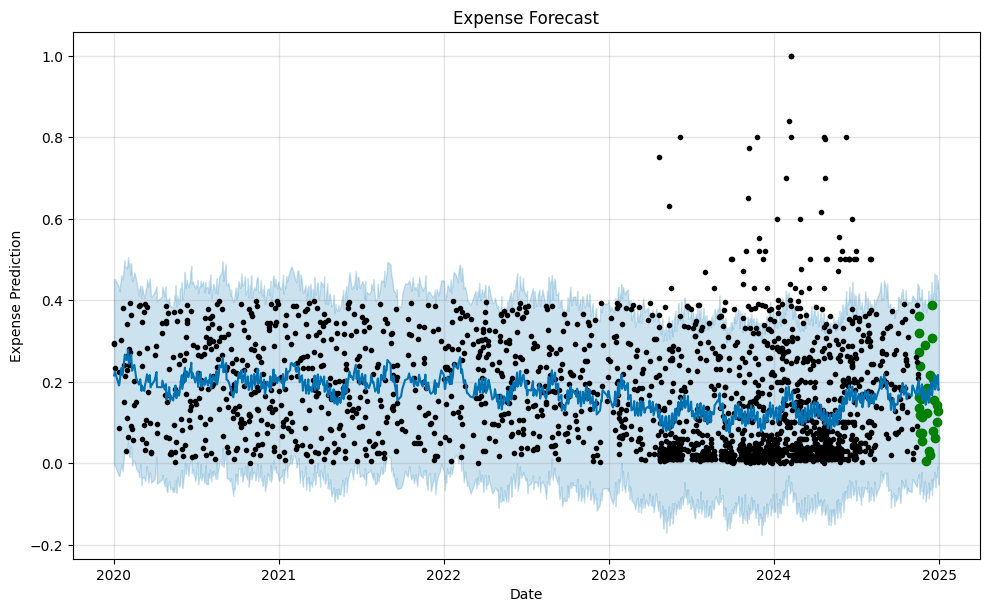

In [56]:
p.plot(forecast_prediction)
# Customize the plot
plt.scatter(test['ds'],test['y'], c='Green')
plt.xlabel('Date')
plt.ylabel('Expense Prediction')
plt.title('Expense Forecast')

In [57]:
denormalized_forecast_4 = denormalize(forecast_prediction['yhat'][-45:])
# split_index = len(TSA) - 30
# train = TSA.iloc[0:split_index]
# test = TSA.iloc[split_index:]
denormalized_test = denormalize(test['y'])

In [58]:
# mae = mean_absolute_error(denormalized_test, denormalized_forecast_4)
# print(f"MAE: {mae}")

In [59]:
print(forecast_prediction.columns)
print(test.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
Index(['ds', 'y'], dtype='object')


In [60]:
# Ensure both have a 'ds' column of dtype datetime64
test["ds"] = pd.to_datetime(test["ds"])
forecast_prediction["ds"] = pd.to_datetime(forecast_prediction["ds"])

merged = test.merge(
    forecast_prediction[["ds", "yhat"]],
    on="ds",
    how="inner"   # only common dates kept
)

print(len(test), len(forecast_prediction), len(merged))  # merged will be <= test


30 1103 30


C:\Users\HP\AppData\Local\Temp\ipykernel_25792\2178036806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["ds"] = pd.to_datetime(test["ds"])


In [61]:
merged.head()

,ds,y,yhat
0,2024-11-17,0.163786,0.205628
1,2024-11-17,0.362209,0.205628
2,2024-11-17,0.320578,0.205628
3,2024-11-18,0.136493,0.168284
4,2024-11-18,0.273864,0.168284


In [62]:
merged['Actual_Denormalized'] = test_filtered['Amount'].values

In [63]:
merged

,ds,y,yhat,Actual_Denormalized
0,2024-11-17,0.163786,0.205628,259.0
1,2024-11-17,0.362209,0.205628,500.0
2,2024-11-17,0.320578,0.205628,120.0
3,2024-11-18,0.136493,0.168284,200.0
4,2024-11-18,0.273864,0.168284,199.0
5,2024-11-19,0.118806,0.170033,30.0
6,2024-11-20,0.237607,0.181259,30.0
7,2024-11-20,0.074452,0.181259,50.0
8,2024-11-22,0.156814,0.174961,50.0
9,2024-11-24,0.164065,0.193890,50.0


In [64]:
mae = mean_absolute_error(merged['y'], merged['yhat'])
print(f"MAE: {mae}")

MAE: 0.08421906014583577


In [65]:
denormalized_forecast_4 = denormalize(merged['yhat'])
denormalized_test = denormalize(test['y'])

In [66]:
mae = mean_absolute_error(denormalized_forecast_4, denormalized_test)
print(f"MAE: {mae}")

MAE: 251.80362026292926


In [67]:
mae = mean_absolute_error(denormalized_forecast_4, merged['Actual_Denormalized'])
print(f"MAE: {mae}")

MAE: 410.358012349647


In [68]:
from joblib import dump, load
dump(p, "../model/prophet_model.pkl")# after training
# later, in production:

p = load("../model/prophet_model.pkl")


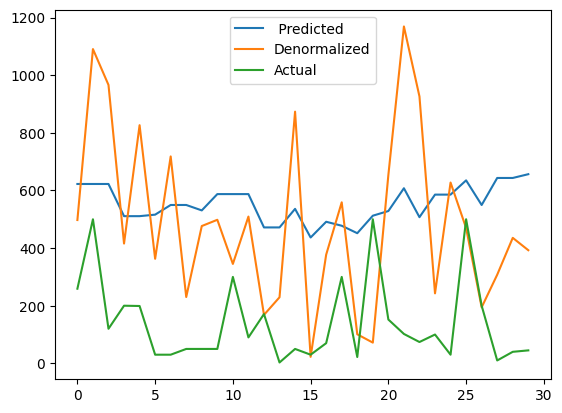

In [69]:
plt.plot(denormalized_forecast_4, label = ' Predicted')
plt.plot(denormalized_test, label = 'Denormalized')
plt.plot(merged['Actual_Denormalized'], label = 'Actual')
plt.legend()

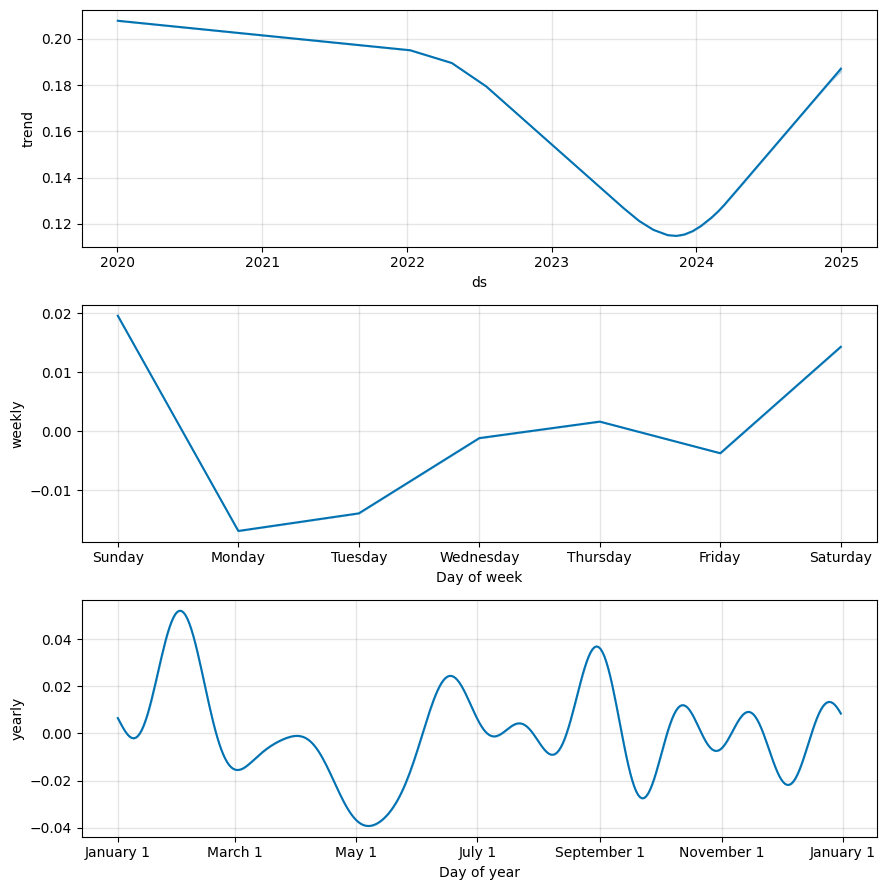

In [70]:
fig = p.plot_components(forecast_prediction)
plt.show()

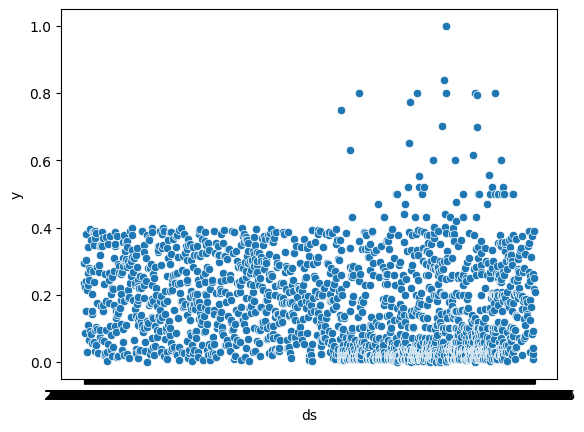

In [71]:
import seaborn as sns
sns.scatterplot(x='ds', y='y', data=train)
plt.show()

# For brand‑new users (cold start)
With no past data for the user, Prophet alone cannot estimate that user’s personal trend/seasonality. Typical options:​

Use a global or template forecast: e.g., “average user” forecast derived from many users, and show that as a very rough baseline until the user has, say, a few weeks of data.​

Switch to a different modeling setup: a global model (NeuralProphet, panel models, or other sequence models) trained on many users, where user ID or features act as regressors so the model can generalize to new users with little data.​

Only enable personalized Prophet forecasts once a user has accumulated enough days of history (e.g., at least 30–60 days so seasonality/trend can be estimated).

In [72]:
df_key

,Unnamed: 0,Date,Amount,Type,Normalized_Amount,dataset
0,0,2020-01-02,1485.69,Expense,0.295349,0
1,1,2020-01-02,1475.58,Expense,0.293320,0
2,2,2020-01-04,1185.08,Expense,0.235005,0
3,3,2020-01-05,2291.00,Income,0.457005,0
4,4,2020-01-13,1126.88,Expense,0.223322,0
...,...,...,...,...,...,...
2587,2587,2024-08-04,4.00,INCOME,0.004004,1
2588,2588,2024-08-07,200.00,EXPENSE,0.200200,1
2589,2589,2024-08-09,10.00,EXPENSE,0.010010,1
2590,2590,2024-08-10,40.00,EXPENSE,0.040040,1


# Ensamble method

In [73]:
import pandas as pd
import numpy as np

def make_sliding_window(df, window=30, horizon=1):
    """
    df: columns ['ds', 'y'], sorted by ds ascending.
    window: number of past days as features.
    horizon: forecast horizon in days (e.g. 1 for next day).
    """
    df = df.sort_values("ds").reset_index(drop=True)
    X, y = [], []
    
    for i in range(window, len(df) - horizon + 1):
        past_vals = df["y"].iloc[i-window:i].values
        target = df["y"].iloc[i + horizon - 1]
        X.append(past_vals)
        y.append(target)
    
    X = np.array(X)
    y = np.array(y)
    
    # Add some calendar features if desired
    ds_used = df["ds"].iloc[window:len(df)-horizon+1].reset_index(drop=True)
    cal = pd.DataFrame({
        "dayofweek": ds_used.dt.dayofweek,
        "month": ds_used.dt.month
    })
    return X, cal, y, ds_used


In [74]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Prepare data
train["ds"] = pd.to_datetime(train["ds"])
# X_lag, X_cal, y, ds_used = make_sliding_window(train, window=60, horizon=30)

X_lag, X_cal, y, ds_used = make_sliding_window(train, window=60, horizon=30)

# Combine lag + calendar features
X = np.hstack([X_lag, X_cal.values])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False  # preserve time order
)

models = {
    "rf": RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        random_state=42
    ),
    "gbr": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "ridge": Ridge(alpha=1.0)
}

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_val)
    print(name, "MAE:", mean_absolute_error(y_val, preds))

# Simple ensemble: equal weight average
def ensemble_predict(X_input):
    preds = np.column_stack([m.predict(X_input) for m in models.values()])
    return preds.mean(axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_25792\1153505744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["ds"] = pd.to_datetime(train["ds"])


rf MAE: 0.10839902600596292
gbr MAE: 0.10812907952150788
ridge MAE: 0.11089540399253732


In [ ]:
import joblib

config = {
    "window": 60,
    "horizon": 30
}

joblib.dump(models, "../model/expense_models_1.pkl")
joblib.dump(config, "../model/expense_config_1.pkl")


['expense_config.pkl']

# Testing

In [ ]:
import numpy as np
import pandas as pd
import joblib

def Load_Model(model_path,config_path):
# Load trained models and config
    models = joblib.load(model_path)   # dict: {"rf": ..., "gbr": ..., "ridge": ...}
    config = joblib.load(config_path)
    WINDOW = config["window"]
    HORIZON = config["horizon"]  # 30
    return models,config,WINDOW,HORIZON

def ensemble_predict_array(X_input):
    preds = np.column_stack([m.predict(X_input) for m in models.values()])
    return preds.mean(axis=1)

def forecast_next_30_days(recent_values, recent_dates,WINDOW,HORIZON):
    """
    recent_values: list/array of last N expenses (N >= WINDOW)
    recent_dates:  list/array of last N dates (strings or datetime), same length as recent_values
    Returns: (forecast_value, future_dates)
        - forecast_value: scalar, predicted average for next 30 days
        - future_dates: pd.DatetimeIndex for those 30 days
    """
    if len(recent_values) < WINDOW:
        raise ValueError(f"Need at least {WINDOW} recent values for forecasting")

    # Take only the most recent WINDOW values
    recent_values = np.array(recent_values[-WINDOW:], dtype=float)
    recent_dates = pd.to_datetime(recent_dates[-WINDOW:])

    # Build lag features: shape (1, WINDOW)
    X_lag = recent_values.reshape(1, -1)

    # Build calendar features using the "prediction anchor" date
    # Here use the last observed date as the anchor
    anchor_date = recent_dates[-1]
    # For the ML model, we use calendar features at anchor time
    X_cal = np.array([[anchor_date.dayofweek, anchor_date.month]], dtype=float)

    # Combine lag + calendar (shape: (1, WINDOW + 2))
    X_input = np.hstack([X_lag, X_cal])

    # Predict average for next 30 days
    avg_30 = ensemble_predict_array(X_input)[0]

    # Build future date index for the next 30 days (if needed for UI)
    future_dates = pd.date_range(start=anchor_date + pd.Timedelta(days=1),
                                 periods=HORIZON, freq="D")

    return avg_30, future_dates


# You have:

y_ds1: values from dataset 1 (low‑range regime).

y_ds2: values from dataset 2 (high‑range regime).

y_sample: recent 30 values for a new user (what you want to classify).

Run a two‑sample K‑S test between y_sample and each dataset:​

ks_1 = ks_2samp(y_sample, y_ds1)

ks_2 = ks_2samp(y_sample, y_ds2)

Compare the K‑S statistic or p‑value:

Smaller statistic / larger p‑value ⇒ distributions are more similar.​

Route to that dataset’s scaler/model.

Example in Python:

In [77]:
import numpy as np
from scipy.stats import beta, ks_2samp

np.random.seed(42)

def Distributions():
    # Fitted parameters
    a1, b1, loc1, scale1 = 1.53, 17.51, 0.0, 16240.45
    a2, b2, loc2, scale2 = 0.77, 86458.28, 0.0, 10187766.47

    # Reference datasets drawn from the fitted distributions
    data1 = beta(a=a1, b=b1, loc=loc1, scale=scale1).rvs(size=10000)
    data2 = beta(a=a2, b=b2, loc=loc2, scale=scale2).rvs(size=10000)

    return data1,data2

# Your 30-point sample (replace this with your real sample array)
# sample = beta(a=3.0, b=4.0, loc=0, scale=3000).rvs(size=30)
# # 2. Sample you want to classify (beta-distributed)


data1,data2 = Distributions()
sample = beta(a=3.0, b=4.0).rvs(size=60) * 3000

# Two-sample K-S tests
def Hypotesis_testing(sample,data1,data2):
    stat1, p1 = ks_2samp(sample, data1)
    stat2, p2 = ks_2samp(sample, data2)

    print(f"KS vs Dataset 1: stat={stat1:.4f}, p={p1:.4e}")
    print(f"KS vs Dataset 2: stat={stat2:.4f}, p={p2:.4e}")

    # Choose closer distribution by smaller KS statistic (or larger p-value)
    chosen = "Dataset 1" if stat1 < stat2 else "Dataset 2"
    print("Sample is closer to:", chosen)

Hypotesis_testing(sample,data1,data2)


KS vs Dataset 1: stat=0.1609, p=8.1442e-02
KS vs Dataset 2: stat=0.9027, p=2.0594e-60
Sample is closer to: Dataset 1


In [78]:
# max1 = 999.0
# min1 = 0.9
# max2 = 4996.0 
# min2 = 14.37

def normalize_d1(x):
    max1 = 999.0
    min1 = 0.9
    epsilon = 1e-6
    x = np.asarray(x, dtype=float)
    scaled = (x - min1) / (max1 - min1)
    scaled = np.clip(scaled, epsilon, 1 - epsilon)
    return scaled

def denormalize_d1(scaled):
    max1 = 999.0
    min1 = 0.9
    scaled = np.asarray(scaled, dtype=float)
    # assume scaled is already in [epsilon, 1-epsilon]
    x = scaled * (max1 - min1) + min1
    return x

def normalize_d2(x):
    max2 = 4996.0 
    min2 = 14.37
    epsilon = 1e-6
    x = np.asarray(x, dtype=float)
    scaled = (x - min2) / (max2 - min2)
    scaled = np.clip(scaled, epsilon, 1 - epsilon)
    return scaled

def denormalize_d2(scaled):
    max2 = 4996.0 
    min2 = 14.37
    scaled = np.asarray(scaled, dtype=float)
    x = scaled * (max2 - min2) + min2
    return x


In [79]:
def Choose_Normalization(chosen):
    if chosen == 'Dataset 1':
        return normalize_d1(sample)
    else:
        return normalize_d2(sample)

In [80]:
import numpy as np
import pandas as pd

# -----------------------------
# 1. Create 60 synthetic expenses
# -----------------------------
np.random.seed(42)
size = 1200

# Example: mostly low-range spends with some noise
user_expenses = np.random.uniform(200, 1500, size=size).round(2).tolist()

# -----------------------------
# 2. Create 60 dates with gaps
# -----------------------------
start = pd.Timestamp("2025-01-01")
dates = []

current = start
for i in range(size):
    dates.append(current)
    # Random gap: 1–3 days
    gap = np.random.choice([1, 1, 2, 3])   # mostly 1, sometimes 2–3
    current = current + pd.Timedelta(days=gap)

user_dates = [d.strftime("%Y-%m-%d") for d in dates]

print("Number of expenses:", len(user_expenses))
print("Number of dates:", len(user_dates))
print("First 5:")
for e, d in list(zip(user_expenses, user_dates))[:5]:
    print(d, "->", e)

print("Last 5:")
for e, d in list(zip(user_expenses, user_dates))[-5:]:
    print(d, "->", e)


Number of expenses: 1200
Number of dates: 1200
First 5:
2025-01-01 -> 686.9
2025-01-02 -> 1435.93
2025-01-05 -> 1151.59
2025-01-07 -> 978.26
2025-01-08 -> 402.82
Last 5:
2030-09-02 -> 1333.0
2030-09-04 -> 1465.54
2030-09-07 -> 1459.54
2030-09-09 -> 1174.55
2030-09-12 -> 369.11


In [81]:
# -----------------------------
# 3. Call your forecast function
# -----------------------------
# This assumes you have already defined forecast_next_30_days(...)
# which internally: routes distribution -> normalizes -> predicts -> denormalizes

# Two-sample K-S tests
stat1, p1 = ks_2samp(user_expenses, data1)
stat2, p2 = ks_2samp(user_expenses, data2)

print(f"KS vs Dataset 1: stat={stat1:.4f}, p={p1:.4e}")
print(f"KS vs Dataset 2: stat={stat2:.4f}, p={p2:.4e}")

# Choose closer distribution by smaller KS statistic (or larger p-value)
chosen = "Dataset 1" if stat1 < stat2 else "Dataset 2"
print("Sample is closer to:", chosen)

if chosen == 'Dataset 1':
    nomrmalized = normalize_d1(user_expenses)
else:
    nomrmalized = normalize_d2(user_expenses)



# avg_next_30, future_dates = forecast_next_30_days(user_expenses, user_dates)

# if avg_next_30 is None:
#     print("Not enough data yet (cold start).")
# else:
#     print("\nPredicted avg spend next 30 days:", avg_next_30)
#     print("Future dates (next 30 days anchor-based):")
#     print(future_dates)


KS vs Dataset 1: stat=0.3313, p=5.2553e-105
KS vs Dataset 2: stat=0.8939, p=4.2490e-322
Sample is closer to: Dataset 1


In [83]:
models,config,WINDOW,HORIZON = Load_Model()
avg_next_30, future_dates = forecast_next_30_days(nomrmalized, user_dates,WINDOW, HORIZON)

if avg_next_30 is None:
    print("Not enough data yet (cold start).")
else:
    print("\nPredicted avg spend next 30 days:", avg_next_30)
    print("Future dates (next 30 days anchor-based):")
    print(future_dates)


Predicted avg spend next 30 days: 0.6076265702755986
Future dates (next 30 days anchor-based):
DatetimeIndex(['2030-09-13', '2030-09-14', '2030-09-15', '2030-09-16',
               '2030-09-17', '2030-09-18', '2030-09-19', '2030-09-20',
               '2030-09-21', '2030-09-22', '2030-09-23', '2030-09-24',
               '2030-09-25', '2030-09-26', '2030-09-27', '2030-09-28',
               '2030-09-29', '2030-09-30', '2030-10-01', '2030-10-02',
               '2030-10-03', '2030-10-04', '2030-10-05', '2030-10-06',
               '2030-10-07', '2030-10-08', '2030-10-09', '2030-10-10',
               '2030-10-11', '2030-10-12'],
              dtype='datetime64[ns]', freq='D')


In [84]:
# avg_next_30

if chosen == 'Dataset 1':
    value = denormalize_d1(avg_next_30)
else:
    value = denormalize_d2(avg_next_30)

In [85]:
import numpy as np
from scipy import stats

def describe_numeric(x):
    x = np.asarray(x, dtype=float)

    desc = {}
    desc["count"] = x.size
    desc["mean"] = np.mean(x)
    desc["median"] = np.median(x)
    mode_res = stats.mode(x, keepdims=True)
    desc["mode"] = float(mode_res.mode[0]) if mode_res.count[0] > 0 else np.nan

    desc["min"] = np.min(x)
    desc["max"] = np.max(x)
    desc["range"] = desc["max"] - desc["min"]

    desc["var"] = np.var(x, ddof=1)        # sample variance
    desc["std"] = np.std(x, ddof=1)        # sample std

    q25, q50, q75 = np.percentile(x, [25, 50, 75])
    desc["q25"] = q25
    desc["q50"] = q50
    desc["q75"] = q75
    desc["iqr"] = q75 - q25

    desc["skew"] = stats.skew(x, bias=False)
    desc["kurtosis"] = stats.kurtosis(x, bias=False)

    return desc


In [86]:
describe_numeric(user_expenses)

{'count': 1200,
 'mean': np.float64(848.9024333333333),
 'median': np.float64(862.5550000000001),
 'mode': 310.95,
 'min': np.float64(206.02),
 'max': np.float64(1499.63),
 'range': np.float64(1293.6100000000001),
 'var': np.float64(146652.66815637588),
 'std': np.float64(382.95256645748685),
 'q25': np.float64(509.4625),
 'q50': np.float64(862.5550000000001),
 'q75': np.float64(1182.9650000000001),
 'iqr': np.float64(673.5025000000002),
 'skew': np.float64(-0.00015683255242732636),
 'kurtosis': np.float64(-1.2536874352639342)}

In [87]:
value

np.float64(607.3720797920749)

# New_Model

In [88]:
import pandas as pd
import numpy as np

def make_sliding_window(df, window=30, horizon=1):
    """
    df: columns ['ds', 'y'], sorted by ds ascending.
    window: number of past days as features.
    horizon: forecast horizon in days (e.g. 1 for next day or avg over next horizon).
    """
    df = df.sort_values("ds").reset_index(drop=True).copy()
    df["ds"] = pd.to_datetime(df["ds"])

    X_lag_list = []
    X_feat_list = []
    y_list = []
    ds_used_list = []

    for i in range(window, len(df) - horizon + 1):
        past_slice = df.iloc[i-window:i]
        target_slice = df.iloc[i:i+horizon]

        # 1) Lag features (raw past values)
        past_vals = past_slice["y"].values  # shape (window,)

        # 2) Rolling stats from past window
        vals = past_vals.astype(float)
        roll_7 = vals[-7:].mean() if len(vals) >= 7 else vals.mean()
        roll_14 = vals[-14:].mean() if len(vals) >= 14 else vals.mean()
        roll_30 = vals[-30:].mean() if len(vals) >= 30 else vals.mean()

        std_7 = vals[-7:].std(ddof=1) if len(vals) >= 7 else vals.std(ddof=1)
        std_14 = vals[-14:].std(ddof=1) if len(vals) >= 14 else vals.std(ddof=1)
        std_30 = vals[-30:].std(ddof=1) if len(vals) >= 30 else vals.std(ddof1)

        # 3) Calendar features based on prediction anchor date
        anchor_ds = df["ds"].iloc[i + horizon - 1]

        dayofweek = anchor_ds.dayofweek
        month = anchor_ds.month
        dayofmonth = anchor_ds.day
        is_weekend = 1 if dayofweek >= 5 else 0
        # pay-day flag: near 1st or 30th (tune as needed)
        is_payday = 1 if dayofmonth in [1, 30, 31] else 0

        # Combine non-lag features into one vector
        extra_feats = [
            dayofweek, month, dayofmonth, is_weekend, is_payday,
            roll_7, roll_14, roll_30,
            std_7, std_14, std_30,
        ]

        # 4) Target: here use mean of next 'horizon' days (30-day avg)
        target = target_slice["y"].mean()

        X_lag_list.append(past_vals)
        X_feat_list.append(extra_feats)
        y_list.append(target)
        ds_used_list.append(anchor_ds)

    X_lag = np.array(X_lag_list)                 # (n_samples, window)
    X_extra = np.array(X_feat_list)              # (n_samples, n_extra_features)
    y = np.array(y_list)                         # (n_samples,)
    ds_used = pd.Series(ds_used_list)

    return X_lag, X_extra, y, ds_used


In [89]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train["ds"] = pd.to_datetime(train["ds"])

# Use window=60 and horizon=30 to predict 30-day avg
X_lag, X_extra, y, ds_used = make_sliding_window(train, window=60, horizon=30)

# Combine lag + extra features
X = np.hstack([X_lag, X_extra])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

models = {
    "rf": RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        random_state=42
    ),
    "gbr": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "ridge": Ridge(alpha=1.0)
}

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_val)
    print(name, "MAE:", mean_absolute_error(y_val, preds))

def ensemble_predict(X_input):
    preds = np.column_stack([m.predict(X_input) for m in models.values()])
    return preds.mean(axis=1)


C:\Users\HP\AppData\Local\Temp\ipykernel_25792\1461444899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["ds"] = pd.to_datetime(train["ds"])


rf MAE: 0.039053318627506765
gbr MAE: 0.03961060060812652
ridge MAE: 0.03330891856138044


In [ ]:
import joblib

config = {
    "window": 60,
    "horizon": 30
}

joblib.dump(models, "../model/expense_models_2.pkl")
joblib.dump(config, "../model/expense_config_2.pkl")


['expense_config_2.pkl']

In [ ]:
import numpy as np
import pandas as pd
import joblib

def Load_Model():
# Load trained models and config
    models = joblib.load("../model/expense_models_2.pkl")   # dict: {"rf": ..., "gbr": ..., "ridge": ...}
    config = joblib.load("../model/expense_config_2.pkl")
    WINDOW = config["window"]
    HORIZON = config["horizon"]  # 30
    return models,config,WINDOW,HORIZON

def ensemble_predict_array(X_input):
    preds = np.column_stack([m.predict(X_input) for m in models.values()])
    return preds.mean(axis=1)

def forecast_next_30_days(recent_values, recent_dates, window=60, horizon=30):
    if len(recent_values) < window:
        return None, None

    vals = np.array(recent_values[-window:], dtype=float)
    dates = pd.to_datetime(recent_dates[-window:])

    # lag features (in same scale as training)
    X_lag = vals.reshape(1, -1)

    # rolling stats (use same choice as in training)
    v = vals
    roll_7  = v[-7:].mean()  if len(v) >= 7  else v.mean()
    roll_14 = v[-14:].mean() if len(v) >= 14 else v.mean()
    roll_30 = v[-30:].mean() if len(v) >= 30 else v.mean()

    std_7  = v[-7:].std(ddof=1)  if len(v) >= 7  else v.std(ddof=1)
    std_14 = v[-14:].std(ddof=1) if len(v) >= 14 else v.std(ddof=1)
    std_30 = v[-30:].std(ddof=1) if len(v) >= 30 else v.std(ddof=1)

    anchor_date = dates[-1]
    dayofweek  = anchor_date.dayofweek
    month      = anchor_date.month
    dayofmonth = anchor_date.day
    is_weekend = 1 if dayofweek >= 5 else 0
    is_payday  = 1 if dayofmonth in [1, 30, 31] else 0

    # EXACT same order and count as training
    X_cal = np.array([[dayofweek, month, dayofmonth,
                       is_weekend, is_payday,
                       roll_7, roll_14, roll_30,
                       std_7, std_14, std_30]], dtype=float)

    X_input = np.hstack([X_lag, X_cal])  # shape (1, 60 + 11 = 71)

    avg_30_norm = ensemble_predict(X_input)[0]

    future_dates = pd.date_range(
        start=anchor_date + pd.Timedelta(days=1),
        periods=horizon,
        freq="D"
    )
    return avg_30_norm, future_dates



In [113]:
import numpy as np
import pandas as pd

# -----------------------------
# 1. Create 60 synthetic expenses
# -----------------------------
np.random.seed(42)
size = 1200

# Example: mostly low-range spends with some noise
user_expenses = np.random.uniform(0, 3000, size=size).round(2).tolist()

# -----------------------------
# 2. Create 60 dates with gaps
# -----------------------------
start = pd.Timestamp("2025-01-01")
dates = []

current = start
for i in range(size):
    dates.append(current)
    # Random gap: 1–3 days
    gap = np.random.choice([1, 1, 2, 3])   # mostly 1, sometimes 2–3
    current = current + pd.Timedelta(days=gap)

user_dates = [d.strftime("%Y-%m-%d") for d in dates]


print("Number of expenses:", len(user_expenses))
print("Number of dates:", len(user_dates))
print("First 5:")
for e, d in list(zip(user_expenses, user_dates))[:5]:
    print(d, "->", e)

print("Last 5:")
for e, d in list(zip(user_expenses, user_dates))[-5:]:
    print(d, "->", e)


stat1, p1 = ks_2samp(user_expenses, data1)
stat2, p2 = ks_2samp(user_expenses, data2)

print(f"KS vs Dataset 1: stat={stat1:.4f}, p={p1:.4e}")
print(f"KS vs Dataset 2: stat={stat2:.4f}, p={p2:.4e}")

# Choose closer distribution by smaller KS statistic (or larger p-value)
chosen = "Dataset 1" if stat1 < stat2 else "Dataset 2"
print("Sample is closer to:", chosen)

if chosen == 'Dataset 1':
    normalized_values = normalize_d1(user_expenses)
else:
    normalized_values = normalize_d2(user_expenses)
    



Number of expenses: 1200
Number of dates: 1200
First 5:
2025-01-01 -> 1123.62
2025-01-02 -> 2852.14
2025-01-05 -> 2195.98
2025-01-07 -> 1795.98
2025-01-08 -> 468.06
Last 5:
2030-09-02 -> 2614.61
2030-09-04 -> 2920.47
2030-09-07 -> 2906.63
2030-09-09 -> 2248.96
2030-09-12 -> 390.26
KS vs Dataset 1: stat=0.1836, p=4.6557e-32
KS vs Dataset 2: stat=0.8507, p=7.0651e-322
Sample is closer to: Dataset 1


In [114]:
models,config,WINDOW,HORIZON = Load_Model()
avg_next_30, future_dates = forecast_next_30_days(normalized_values, user_dates,WINDOW, HORIZON)

if avg_next_30 is None:
    print("Not enough data yet (cold start).")
else:
    print("\nPredicted avg spend next 30 days:", avg_next_30)
    print("Future dates (next 30 days anchor-based):")
    print(future_dates)


Predicted avg spend next 30 days: 0.23757694334226084
Future dates (next 30 days anchor-based):
DatetimeIndex(['2030-09-13', '2030-09-14', '2030-09-15', '2030-09-16',
               '2030-09-17', '2030-09-18', '2030-09-19', '2030-09-20',
               '2030-09-21', '2030-09-22', '2030-09-23', '2030-09-24',
               '2030-09-25', '2030-09-26', '2030-09-27', '2030-09-28',
               '2030-09-29', '2030-09-30', '2030-10-01', '2030-10-02',
               '2030-10-03', '2030-10-04', '2030-10-05', '2030-10-06',
               '2030-10-07', '2030-10-08', '2030-10-09', '2030-10-10',
               '2030-10-11', '2030-10-12'],
              dtype='datetime64[ns]', freq='D')


In [115]:
if chosen == 'Dataset 1':
        avg_next_30 = denormalize_d1(avg_next_30)
else:
        avg_next_30 = denormalize_d2(avg_next_30)
    # print("\nPredicted avg spend next 30 days:", avg_next_30)
    # print("Future dates (next 30 days anchor-based):")
print(avg_next_30)
print(future_dates)


238.02554714991055
DatetimeIndex(['2030-09-13', '2030-09-14', '2030-09-15', '2030-09-16',
               '2030-09-17', '2030-09-18', '2030-09-19', '2030-09-20',
               '2030-09-21', '2030-09-22', '2030-09-23', '2030-09-24',
               '2030-09-25', '2030-09-26', '2030-09-27', '2030-09-28',
               '2030-09-29', '2030-09-30', '2030-10-01', '2030-10-02',
               '2030-10-03', '2030-10-04', '2030-10-05', '2030-10-06',
               '2030-10-07', '2030-10-08', '2030-10-09', '2030-10-10',
               '2030-10-11', '2030-10-12'],
              dtype='datetime64[ns]', freq='D')
